# Generating the data 

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from pandas import DataFrame
X_train,_=make_blobs(n_samples=500,centers=3,n_features=2,random_state=20)

# Visualize the data

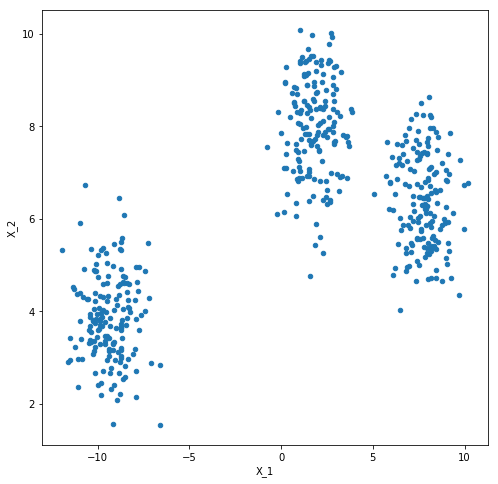

In [3]:
df=DataFrame(dict(x=X_train[:,0],y=X_train[:,1]))
fig,ax=plt.subplots(figsize=(8,8))
df.plot(ax=ax,kind='scatter',x='x',y='y')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

In [7]:
## Generation of centroids 
def init_centroids(k,X):
    arr=[]
    for i in range(k):
        cx1=np.random.uniform(min(X[:,0]),max(X[:,0]))
        cx2=np.random.uniform(min(X[:,1]),max(X[:,1]))
        arr.append([cx1,cx2])
    return np.array(arr)

In [8]:
def dist(a,b):
    return np.sqrt(sum(np.square(a-b)))

In [9]:
def assign_cluster(k,X,cg):
    cluster=[-1]*len(X)
    for i in range (len(X)):
        dist_arr=[]
        for j in range(k):
            dist_arr.append(dist(X[i],cg[j]))
        idx=np.argmin(dist_arr)
        cluster[i]=idx
    return np.asarray(cluster)

In [10]:
def compute_centroids(k,X,cluster):
    cg_arr=[]
    for i in range (k):
        arr=[]
        for j in range (len (X)):
            if cluster[j]==i:
                arr.append(X[j])
        cg_arr.append(np.mean(arr,axis=0))
    return np.asarray(cg_arr)

In [11]:
def measure_change(cg_prev,cg_new):
    res=0
    for a,b in zip (cg_prev,cg_new):
        res+=dist(a,b)
    return res

In [12]:
def show_clusters(X,cluster,cg):
    df=DataFrame(dict(x=X[:,0],y=X[:,1],label=cluster))
    colors={0:'blue',1:'orange',2:'green'}
    fig,ax=plt.subplots(figsize=(8,8))
    grouped=df.groupby('label')
    for key,group in grouped:
        group.plot(ax=ax,kind='scatter',x='x',y='y',label=key,color=colors[key])
    ax.scatter(cg[:,0],cg[:,1],marker='*',s=150,c='#ff2222')
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.show()

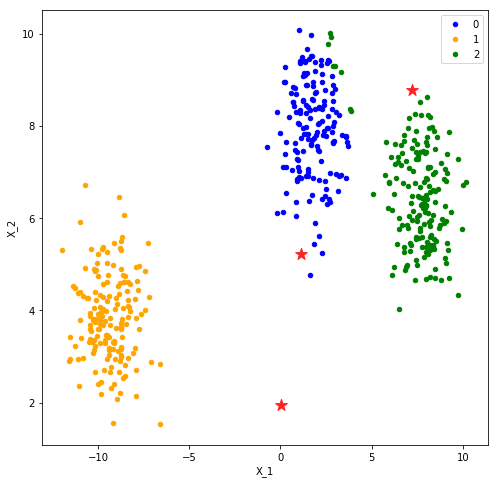

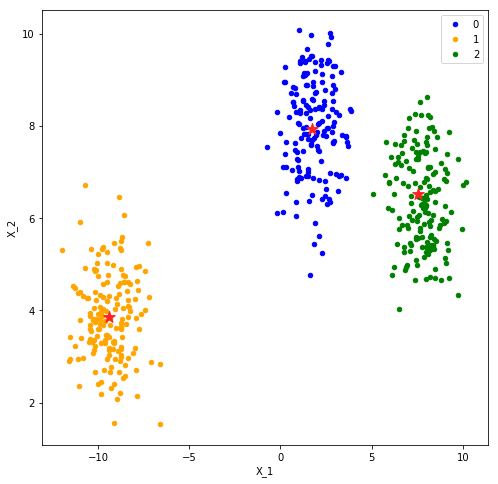

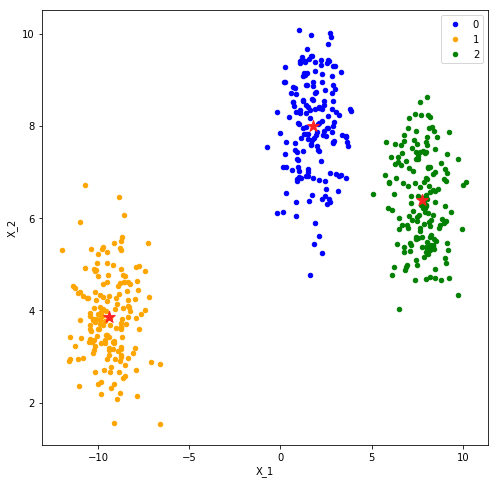

In [15]:
def k_means(k,X):
    cg_prev=init_centroids(k,X)
    cluster=[0]*len(X)
    cg_change=100
    while cg_change>0.001:
        cluster=assign_cluster(k,X,cg_prev)
        show_clusters(X,cluster,cg_prev)
        cg_new=compute_centroids(k,X,cluster)
        cg_change=measure_change(cg_new,cg_prev)
        cg_prev=cg_new
    return cluster 

cluster=k_means(3,X_train)